In [15]:
!pip install tensorflow scipy matplotlib

import numpy as np
import scipy.io
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [17]:
# Step 2: Upload the MNIST .mat file to Colab

# Define the file path
file_path = '/content/mnist-original.mat'

In [18]:
# Step 3: Load the MNIST dataset from the .mat file
try:
    data = scipy.io.loadmat(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")

# Print the keys to understand the structure of the file
print("Keys in the file:", data.keys())

# Assuming the keys are 'data' and 'label', otherwise adjust accordingly
if 'data' in data and 'label' in data:
    images = data['data']
    labels = data['label']
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
else:
    raise KeyError("Expected keys 'data' and 'label' not found in the file.")

# MNIST images are typically in columns, need to reshape and transpose
images = images.T
labels = labels.flatten()

# Normalize pixel values to the range [0, 1]
images = images.astype('float32') / 255.0

# Reshape images to 28x28 and add channel dimension (for grayscale)
images = images.reshape(-1, 28, 28, 1)

# Split into training and test sets
num_samples = images.shape[0]
split_index = int(0.8 * num_samples)
x_train, x_test = images[:split_index], images[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

File loaded successfully.
Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
Images shape: (784, 70000)
Labels shape: (1, 70000)


In [19]:
# Step 4: Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 62s 76ms/step - accuracy: 0.8789 - loss: 0.3898 - val_accuracy: 0.6029 - val_loss: 4.6342
Epoch 2/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 73s 65ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.6198 - val_loss: 4.8087
Epoch 3/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9896 - loss: 0.0310 - val_accuracy: 0.6420 - val_loss: 5.2569
Epoch 4/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.6293 - val_loss: 5.1851
Epoch 5/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.6273 - val_loss: 5.2497


In [22]:
# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3533 - loss: 9.4280
Test accuracy: 0.6367856860160828


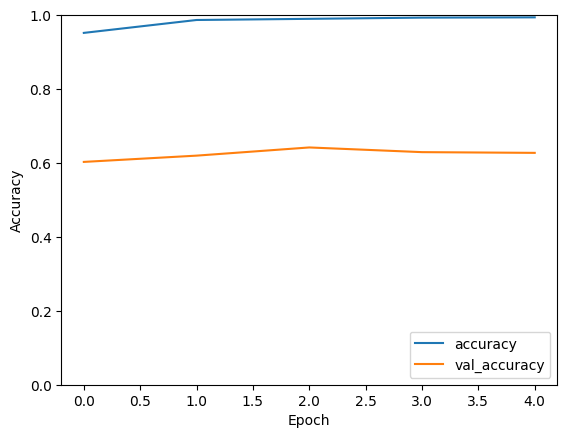

In [25]:
# Optionally, plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [26]:
from PIL import Image
import numpy as np

# Load the image file
image_path = '/content/download.jpg'
image = Image.open(image_path)

In [27]:
# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Convert the image to grayscale (if it isn't already)
image = image.convert('L')

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize pixel values to the range [0, 1]
image_array = image_array.astype('float32') / 255.0

# Reshape the image to match model input (28, 28, 1)
image_array = image_array.reshape(1, 28, 28, 1)

In [28]:
# Load your trained model if not already in memory
# model = tf.keras.models.load_model('path_to_your_saved_model.h5')

# Make a prediction
predictions = model.predict(image_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

print(f'Predicted class: {predicted_class[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted class: 0
